###  This is a new file to try other methods on arival times framework for predictions 

In [1]:
#Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
import seaborn as sns
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import packages required for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier


from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pymysql

import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

import scipy.stats as ss

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in csv prepared from previous data cleaning 
df = pd.read_csv('feat_df.csv')

In [3]:
df.head(50)

,Unnamed: 0,TRIPID,PROGRNUMBER,DIRECTION,ACTUALTIME_ARR,hour,dayofweek,trip_dep_time,weekday,rain,temp,humidity,wind_speed,wind_dir,sun,visibility,cloud_height,cloud_cover,holiday
0,0,5956266,1,2,39636,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
1,1,5956266,2,2,39675,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
2,2,5956266,3,2,39744,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
3,3,5956266,4,2,39782,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
4,4,5956266,5,2,39809,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
5,5,5956266,6,2,39829,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
6,6,5956266,7,2,39877,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
7,7,5956266,8,2,39931,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
8,8,5956266,9,2,39943,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
9,9,5956266,10,2,39983,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1


In [4]:
#remove first trip - no departure time available for it
# df = df.iloc[41:] # (don't run this again or it will delete the next 41 rows)


In [5]:
#reset index
df = df.reset_index()

In [6]:
df.head()

,index,Unnamed: 0,TRIPID,PROGRNUMBER,DIRECTION,ACTUALTIME_ARR,hour,dayofweek,trip_dep_time,weekday,rain,temp,humidity,wind_speed,wind_dir,sun,visibility,cloud_height,cloud_cover,holiday
0,0,0,5956266,1,2,39636,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
1,1,1,5956266,2,2,39675,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
2,2,2,5956266,3,2,39744,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
3,3,3,5956266,4,2,39782,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
4,4,4,5956266,5,2,39809,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1


In [7]:
df = df.drop(['Unnamed: 0', 'index'], axis = 1)

In [8]:
df.head()

,TRIPID,PROGRNUMBER,DIRECTION,ACTUALTIME_ARR,hour,dayofweek,trip_dep_time,weekday,rain,temp,humidity,wind_speed,wind_dir,sun,visibility,cloud_height,cloud_cover,holiday
0,5956266,1,2,39636,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
1,5956266,2,2,39675,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
2,5956266,3,2,39744,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
3,5956266,4,2,39782,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1
4,5956266,5,2,39809,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,200,4,1


### Setting up data


In [9]:
#creat a continuos columns list
continuous_columns = [ 'trip_dep_time', 'humidity', 'wind_speed',
       'wind_dir', 'visibility', 'cloud_height', 'cloud_cover']

In [10]:
sampling_df = df.groupby(['TRIPID', 'hour'], group_keys=False).apply(lambda df: df.sample(20)  if df.shape[0] >= 20 else df)

In [11]:
y = pd.DataFrame(sampling_df["ACTUALTIME_ARR"])
X = sampling_df.drop(["ACTUALTIME_ARR"],1)

In [12]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("original range is: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  1211178
training range (70%):	 rows 0 to 207763
test range (30%): 	 rows 207763 to 296805


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

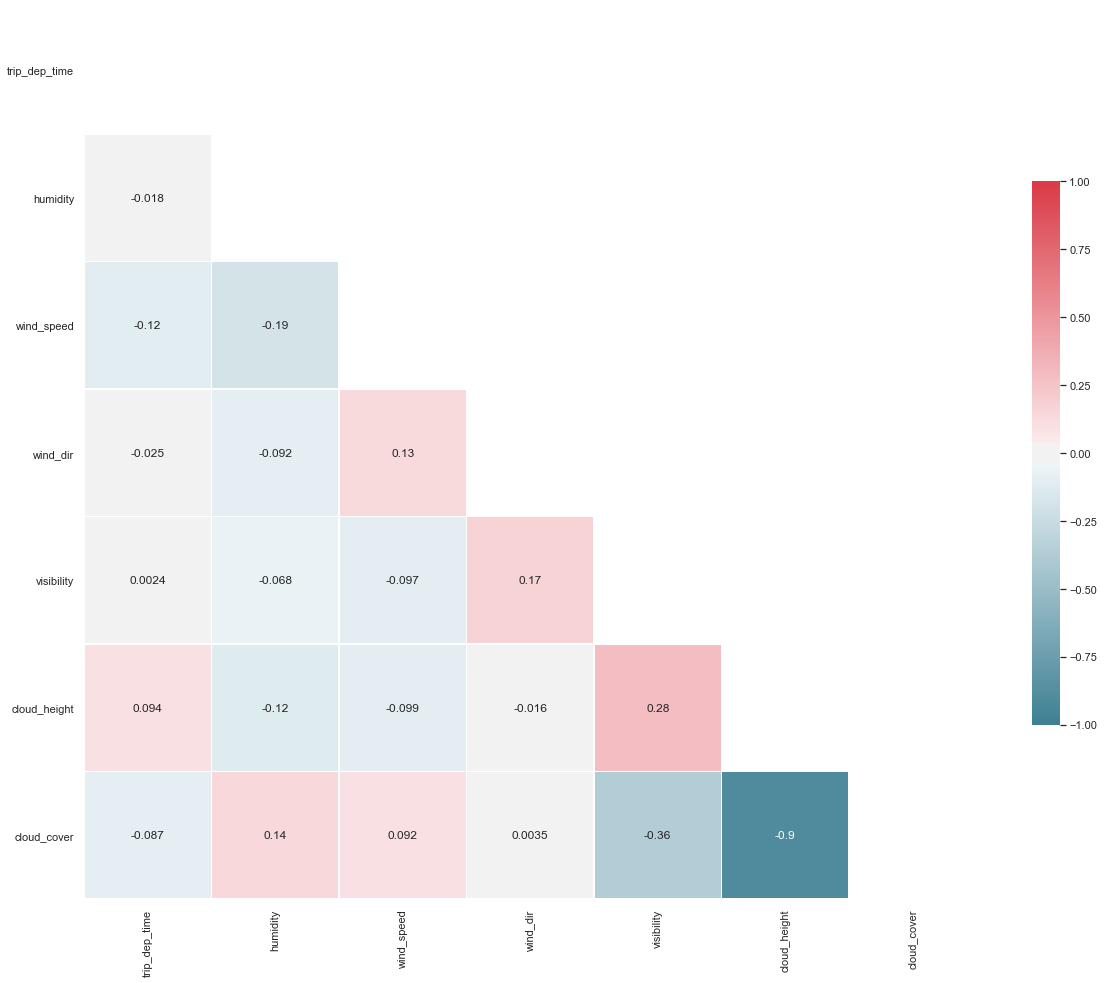

In [13]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = X_train[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [14]:
#make copy of dataframe in case 
df_1 = df.copy()

In [15]:
#Drop Cloud Height too correlated with with cloud cover
df_1.drop(['cloud_height'], axis=1)

,TRIPID,PROGRNUMBER,DIRECTION,ACTUALTIME_ARR,hour,dayofweek,trip_dep_time,weekday,rain,temp,humidity,wind_speed,wind_dir,sun,visibility,cloud_cover,holiday
0,5956266,1,2,39636,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,4,1
1,5956266,2,2,39675,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,4,1
2,5956266,3,2,39744,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,4,1
3,5956266,4,2,39782,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,4,1
4,5956266,5,2,39809,11,0,39636,0,0.0,6.3,7,22,250,0.5,30000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211173,8587034,39,2,31033,8,0,28813,0,0.0,9.5,9,6,230,0.0,35000,7,0
1211174,8587034,40,2,31067,8,0,28813,0,0.0,9.5,9,6,230,0.0,35000,7,0
1211175,8587034,41,2,31115,8,0,28813,0,0.0,9.5,9,6,230,0.0,35000,7,0
1211176,8587034,42,2,31150,8,0,28813,0,0.0,9.5,9,6,230,0.0,35000,7,0


In [16]:
# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(X['hour'], prefix='hour', drop_first=True)
# Add all the columns to the model data
X = pd.concat([X, add_var], axis=1)
# Drop the original column that was expanded
X.drop(columns=['hour'], inplace=True)
X.head()

,TRIPID,PROGRNUMBER,DIRECTION,dayofweek,trip_dep_time,weekday,rain,temp,humidity,wind_speed,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
6211,5956085,19,1,0,41171,2,0.0,6.8,7,25,...,0,0,0,0,0,0,0,0,0,0
6208,5956085,16,1,0,41171,2,0.0,6.8,7,25,...,0,0,0,0,0,0,0,0,0,0
9919,5956085,28,1,0,41193,3,0.2,4.9,7,26,...,0,0,0,0,0,0,0,0,0,0
9899,5956085,8,1,0,41193,3,0.2,4.9,7,26,...,0,0,0,0,0,0,0,0,0,0
13578,5956085,4,1,0,40835,4,0.0,3.0,6,8,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Get dummies for weekday as well
# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(X['weekday'], prefix='weekday', drop_first=True)
# Add all the columns to the model data
X = pd.concat([X, add_var], axis=1)
# Drop the original column that was expanded
X.drop(columns=['weekday'], inplace=True)
X.head()

,TRIPID,PROGRNUMBER,DIRECTION,dayofweek,trip_dep_time,rain,temp,humidity,wind_speed,wind_dir,...,hour_20,hour_21,hour_22,hour_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
6211,5956085,19,1,0,41171,0.0,6.8,7,25,250,...,0,0,0,0,0,1,0,0,0,0
6208,5956085,16,1,0,41171,0.0,6.8,7,25,250,...,0,0,0,0,0,1,0,0,0,0
9919,5956085,28,1,0,41193,0.2,4.9,7,26,250,...,0,0,0,0,0,0,1,0,0,0
9899,5956085,8,1,0,41193,0.2,4.9,7,26,250,...,0,0,0,0,0,0,1,0,0,0
13578,5956085,4,1,0,40835,0.0,3.0,6,8,250,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,TRIPID,PROGRNUMBER,DIRECTION,hour,dayofweek,trip_dep_time,weekday,rain,temp,humidity,wind_speed,wind_dir,sun,visibility,cloud_height,cloud_cover,holiday
0,7146532,24,2,21,1,77400,5,0.0,16.4,14,7,90,0.0,50000,999,1,2
1,8077344,4,2,10,0,37810,4,0.0,7.0,6,5,250,1.0,40000,999,3,0
2,6372901,43,2,14,0,48003,1,0.0,6.4,5,7,240,0.2,25000,40,5,0
3,7174803,33,1,20,1,72011,5,0.0,19.2,14,7,290,0.0,30000,190,6,2
4,8078414,35,1,9,1,32409,5,0.0,14.1,13,17,200,0.0,20000,22,7,0


## Random Forest Model

In [19]:
# # Train RF with 100 trees
# rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
# rfc.fit(X_train, y_train)

In [20]:
# importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
# importance.sort_values('importance', ascending=False)

In [21]:
# print("==================== Train Data =======================")
# print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
# print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
# print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

random forest model not working still going to try XGBoost instead

## XGBoost model

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)